In [1]:
import pandas as pd
import numpy as np
import datetime

# 土地

# データ読み込み

In [2]:
land_data_daily = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\land_data_daily.csv")

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_25384\3754770459.py:1: DtypeWarning: Columns (6,15,39) have mixed types. Specify dtype option on import or set low_memory=False.
  land_data_daily = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\land_data_daily.csv")


In [ ]:
land_data_daily.head()

,register_date,pref,city,new_or_existing,type,location,chiban,kaoku_number,land_num,other,...,on_day_reason_group_collateral_next,on_day_reason_group_inheritance_or_gift_transfer_next,on_day_reason_group_other_causes_transfer_next,on_day_reason_group_ownership_origin_next,on_day_reason_group_physical_change_next,on_day_reason_group_restriction_next,on_day_reason_group_sale_next,on_day_reason_group_title_or_right_correction_next,on_day_reason_group_title_registration_next,days_until_next
0,2023-01-27,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,NaN,1047-1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,26.0
1,2023-02-22,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,NaN,1047-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-28,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,NaN,1047-3,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0
3,2023-03-13,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,NaN,1047-3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-01,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,NaN,1220,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import datetime
land_data_daily['register_date'] = pd.to_datetime(land_data_daily['register_date'])

In [ ]:
print(len(land_data_daily))
print(land_data_daily.columns)

16868447
Index(['register_date', 'pref', 'city', 'new_or_existing', 'type', 'location',
       'chiban', 'kaoku_number', 'land_num', 'other', 'lat', 'lon', 'size',
       'building_coverage_ratio', 'floor_area_ratio', 'use_district',
       'official_price', 'land_price', 'lat2', 'lon2', 'property_name',
       'address', 'min_exclusive_area', 'max_exclusive_area', 'build_date',
       'total_units', 'ground_floors', 'underground_floors', 'parking_spaces',
       'main_direction', 'land_area', 'building_area', 'total_floor_area',
       'max_layout', 'min_layout', 'property_type', 'structure', 'id',
       'line_name', 'station_name', 'on_foot', 'parcel_num', 'address_group',
       'group_key', 'same_day_count', 'on_day_reason_group_cancellation',
       'on_day_reason_group_collateral',
       'on_day_reason_group_inheritance_or_gift_transfer',
       'on_day_reason_group_other_causes_transfer',
       'on_day_reason_group_ownership_origin',
       'on_day_reason_group_physical_chang

# 特徴量の選定（欠損除去によりデータ数が減ってしまうことを防ぐ＋目的変数の分布が偏らない）

In [4]:
print(land_data_daily['on_foot'].isna().sum())
land_data_daily['on_foot'].value_counts()

8443151


on_foot
7.0       363513
6.0       354791
9.0       336391
8.0       330305
5.0       311508
           ...  
2310.0         1
2041.0         1
2047.0         1
2062.0         1
3682.0         1
Name: count, Length: 2803, dtype: int64

In [4]:
# monthを抽出する
land_data_daily['month'] = land_data_daily['register_date'].dt.month
land_data_daily['month_sin'] = np.sin(2 * np.pi * land_data_daily['month'] / 12)

In [5]:
# 各都道府県の人口密度データを辞書形式で用意(令和2年度，最新版)　1km2あたりの人口
prefecture_density = {
    '北海道': 66.6, '青森県': 128.3, '岩手県': 79.2, '宮城県': 316.1, '秋田県': 82.4,
    '山形県': 114.6, '福島県': 133.0, '茨城県': 470.2, '栃木県': 301.7, '群馬県': 304.8,
    '埼玉県': 1934.0, '千葉県': 1218.5, '東京都': 6402.6, '神奈川県': 3823.2, '新潟県': 174.9,
    '富山県': 243.6, '石川県': 270.5, '福井県': 183.0, '山梨県': 181.4, '長野県': 151.0,
    '岐阜県': 186.3, '静岡県': 467.2, '愛知県': 1458.0, '三重県': 306.6, '滋賀県': 351.9,
    '京都府': 559.0, '大阪府': 4638.4, '兵庫県': 650.5, '奈良県': 358.8, '和歌山県': 195.3,
    '鳥取県': 157.8, '島根県': 100.1, '岡山県': 265.4, '広島県': 330.2, '山口県': 219.6,
    '徳島県': 173.5, '香川県': 506.3, '愛媛県': 235.2, '高知県': 97.3, '福岡県': 1029.8,
    '佐賀県': 332.5, '長崎県': 317.7, '熊本県': 234.6, '大分県': 177.2, '宮崎県': 138.3,
    '鹿児島県': 172.9, '沖縄県': 642.9
}

# DataFrameに人口密度カラムを追加
land_data_daily['population_density'] = land_data_daily['pref'].map(prefecture_density)

In [6]:
land_data_daily = pd.get_dummies(land_data_daily, columns=['use_district'], prefix='dummy', drop_first=True, dtype=float)

## 登記日が複数ある物件のうち、最後の登記日であるレコードを削除する

In [7]:
# 各 group_key ごとの登記日数をカウント → 登記日数フラグ列を作成（再登記される場合は0）
date_counts = land_data_daily.groupby('group_key')['register_date'].transform('nunique')
land_data_daily['will_not_be_re_registered'] = (date_counts <= 1).astype(int)

# 最終登記日を取得（すべての group_key 対象でOK）
last_date = land_data_daily.groupby('group_key')['register_date'].transform('max')

# フィルタ適用：再登記がある場合は最終日を除く、再登記がないものはそのまま残す
land_data_daily = land_data_daily[
    (land_data_daily['will_not_be_re_registered'] == 1) |
    (land_data_daily['register_date'] < last_date)
]


In [ ]:
land_data_daily.head()

,register_date,pref,city,new_or_existing,type,location,chiban,kaoku_number,land_num,other,...,dummy_category_ii_low_rise_exclusive_residential_district,dummy_category_ii_mid_high_rise_residential_district,dummy_category_ii_residential_district,dummy_commercial_district,dummy_exclusively_industrial_district,dummy_industrial_district,dummy_neighborhood_commercial_district,dummy_quasi_industrial_district,dummy_semi_residential_district,will_not_be_re_registered
0,2023-01-27,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,NaN,1047-1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2023-02-28,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,NaN,1047-3,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2022-02-01,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,NaN,1220,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,2022-04-01,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,NaN,1891-2,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,2022-03-16,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,NaN,2085,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## 目的変数の分布が変わらないかをチェック

In [9]:
# 特徴量と目的変数のカラム名を定義（_nextを除外）
feature_cols = (
    ['month_sin', 'same_day_count', 'size', 'official_price', 'population_density',
     'building_coverage_ratio', 'floor_area_ratio', 'on_foot']
    + [col for col in land_data_daily.columns
       if col.startswith('on_day_reason_group_') and not col.endswith('_next')]
    + [col for col in land_data_daily.columns if col.startswith('dummy_')]
)

target_cols = [col for col in land_data_daily.columns
               if col.startswith('on_day_reason_group_') and col.endswith('_next')] + ['days_until_next']

# 欠損除去前のレコード数
original_len = len(land_data_daily)

# 特徴量の欠損を除去（目的変数には影響しない）
filtered_data = land_data_daily.dropna(subset=feature_cols)

# 欠損除去後のレコード数
filtered_len = len(filtered_data)

# 減少数と割合を出力
print(f"元のデータ数: {original_len}")
print(f"欠損除去後のデータ数: {filtered_len}")
print(f"減少数: {original_len - filtered_len}")
print(f"減少割合: {(original_len - filtered_len) / original_len:.2%}")


元のデータ数: 13701157
欠損除去後のデータ数: 2166890
減少数: 11534267
減少割合: 84.18%


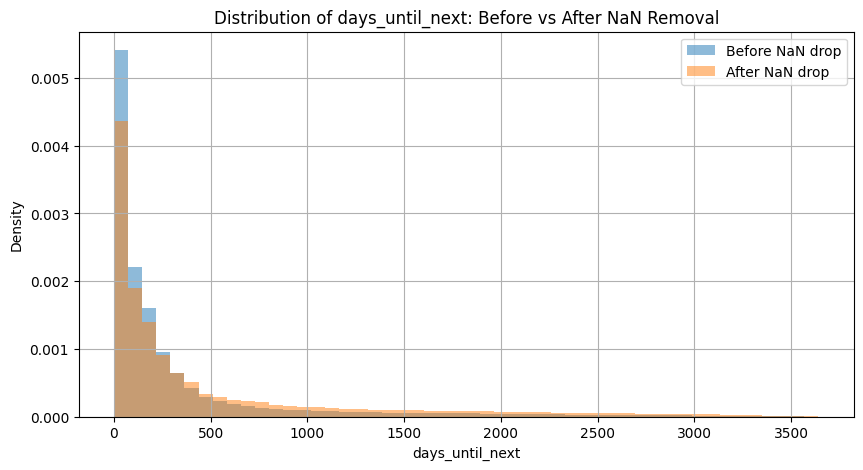

In [10]:
import matplotlib.pyplot as plt

# 欠損除去前の days_until_next をコピー
days_before = land_data_daily['days_until_next'].dropna()

# 欠損除去後の days_until_next
days_after = filtered_data['days_until_next']

# ヒストグラム比較
plt.figure(figsize=(10, 5))
plt.hist(days_before, bins=50, alpha=0.5, label='Before NaN drop', density=True)
plt.hist(days_after, bins=50, alpha=0.5, label='After NaN drop', density=True)
plt.xlabel('days_until_next')
plt.ylabel('Density')
plt.title('Distribution of days_until_next: Before vs After NaN Removal')
plt.legend()
plt.grid(True)
plt.show()


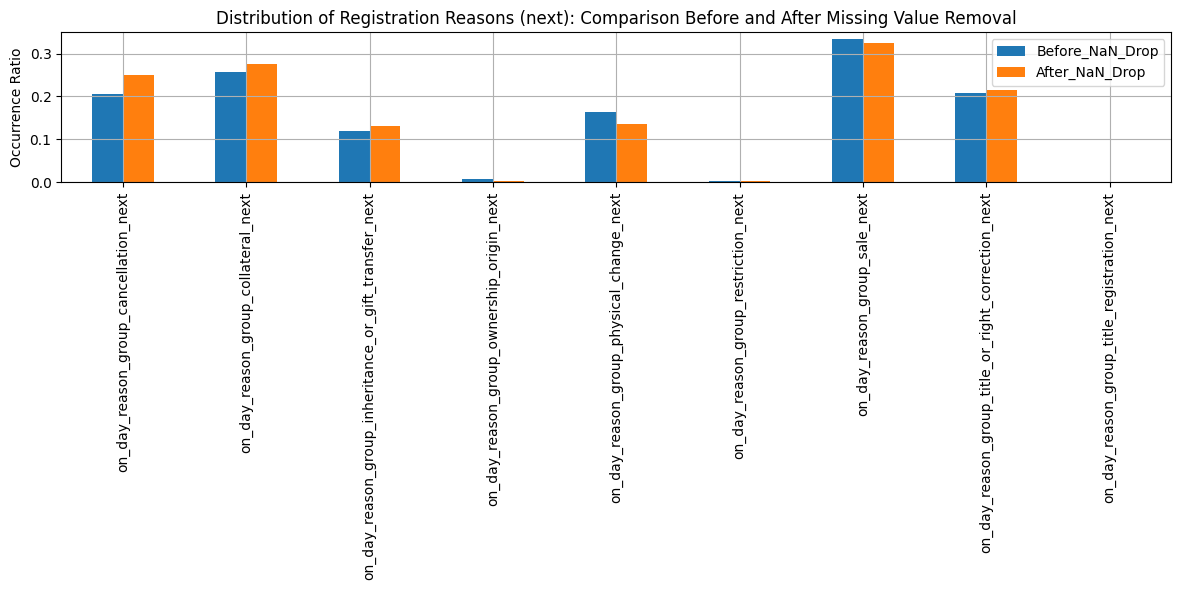

In [ ]:
# 目的変数の one-hot 登記原因カラム一覧
reason_next_cols = [col for col in land_data_daily.columns if col.startswith('on_day_reason_group_') and col.endswith('_next')]

# 欠損除去前：各カテゴリの平均（＝出現比率）
before_ratio = land_data_daily[reason_next_cols].dropna().mean()

# 欠損除去後：NaN除去後のサブセットでの平均（＝出現比率）
after_ratio = filtered_data[reason_next_cols].mean()

# 比率比較を1つのDataFrameにまとめて表示
comparison_df = pd.DataFrame({
    'Before_NaN_Drop': before_ratio,
    'After_NaN_Drop': after_ratio,
    'Difference': after_ratio - before_ratio
})

import seaborn as sns
import matplotlib.pyplot as plt

# 棒グラフで可視化
comparison_df[['Before_NaN_Drop', 'After_NaN_Drop']].plot.bar(figsize=(12, 6))
plt.title('Distribution of Registration Reasons (next): Comparison Before and After Missing Value Removal')
plt.ylabel('Occurrence Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(comparison_df)

                                                    Before_NaN_Drop  \
on_day_reason_group_cancellation_next                      0.205949   
on_day_reason_group_collateral_next                        0.257990   
on_day_reason_group_inheritance_or_gift_transfe...         0.118392   
on_day_reason_group_ownership_origin_next                  0.007740   
on_day_reason_group_physical_change_next                   0.163311   
on_day_reason_group_restriction_next                       0.001943   
on_day_reason_group_sale_next                              0.332957   
on_day_reason_group_title_or_right_correction_next         0.207462   
on_day_reason_group_title_registration_next                0.000682   

                                                    After_NaN_Drop  Difference  
on_day_reason_group_cancellation_next                     0.249948    0.043999  
on_day_reason_group_collateral_next                       0.276002    0.018012  
on_day_reason_group_inheritance_or_gift_transf

In [11]:
print(land_data_daily['days_until_next'].isnull().sum())
print(land_data_daily["will_not_be_re_registered"].value_counts())
print(filtered_data['days_until_next'].isnull().sum())
print(filtered_data['will_not_be_re_registered'].value_counts())

8358051
will_not_be_re_registered
1    8358051
0    5343106
Name: count, dtype: int64
898499
will_not_be_re_registered
0    1268391
1     898499
Name: count, dtype: int64


will_not_be_re_registered
1    8358051
0    5343106
Name: count, dtype: int64

np.int64(898499)

will_not_be_re_registered
0    1268391
1     898499
Name: count, dtype: int64

## 特徴量の分布に変化がないかもチェック

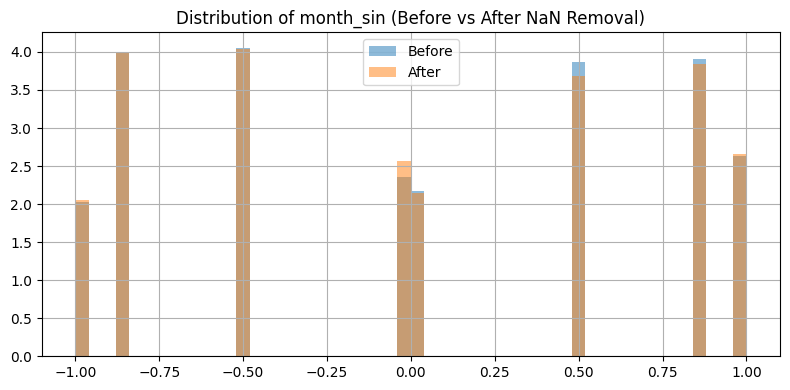

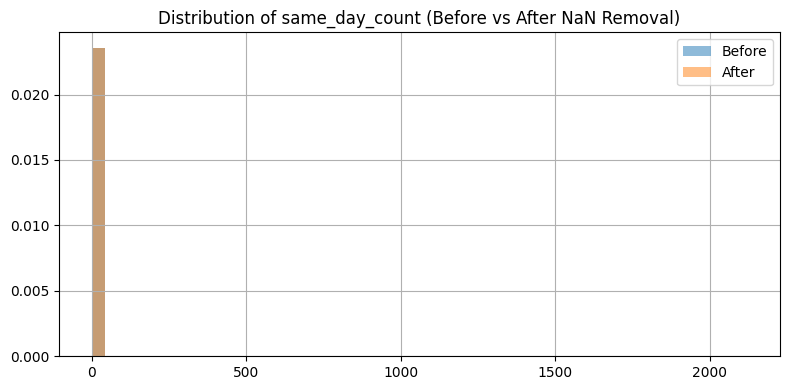

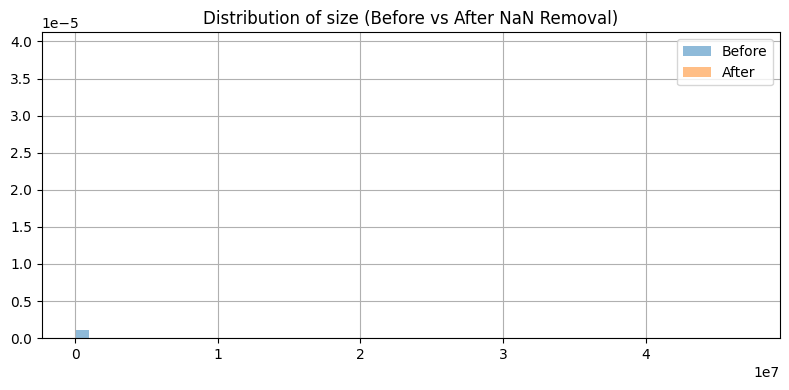

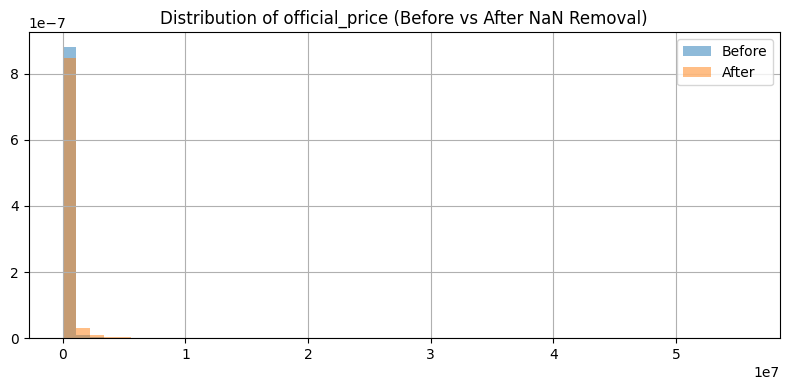

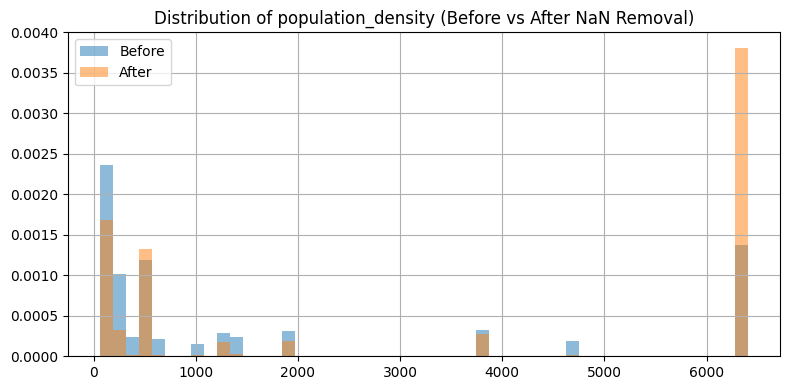

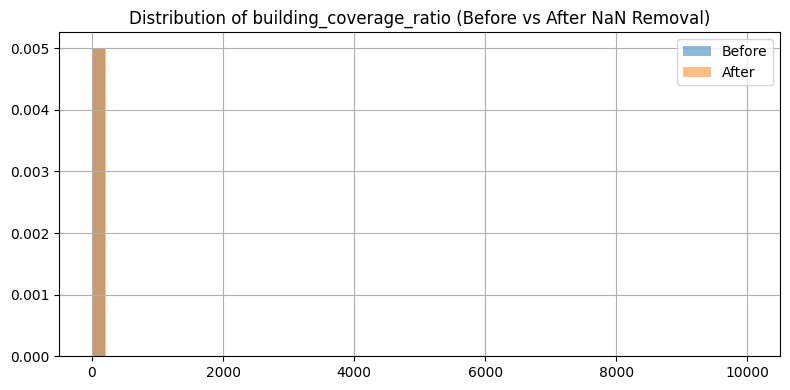

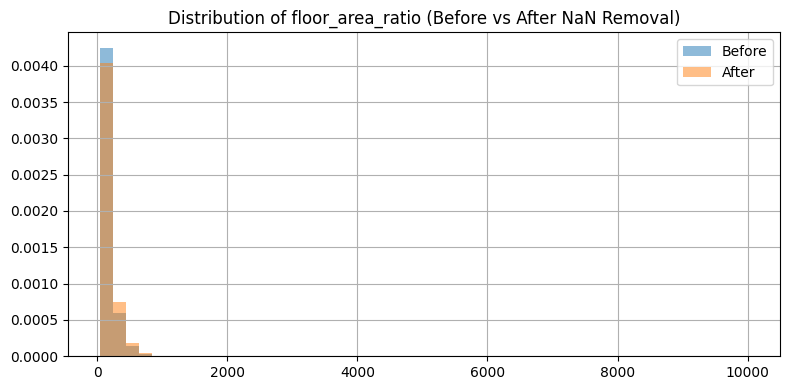

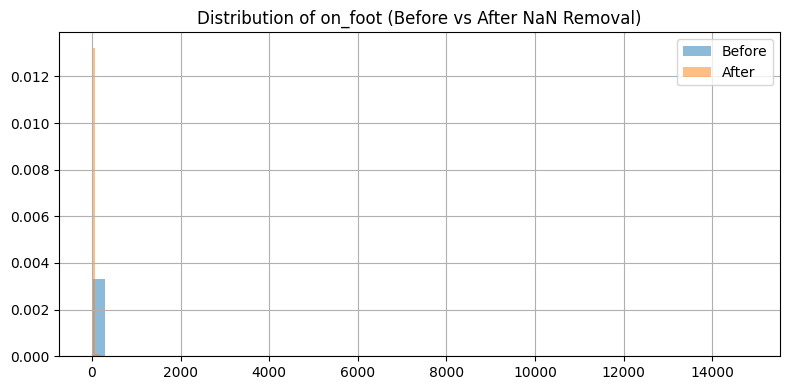

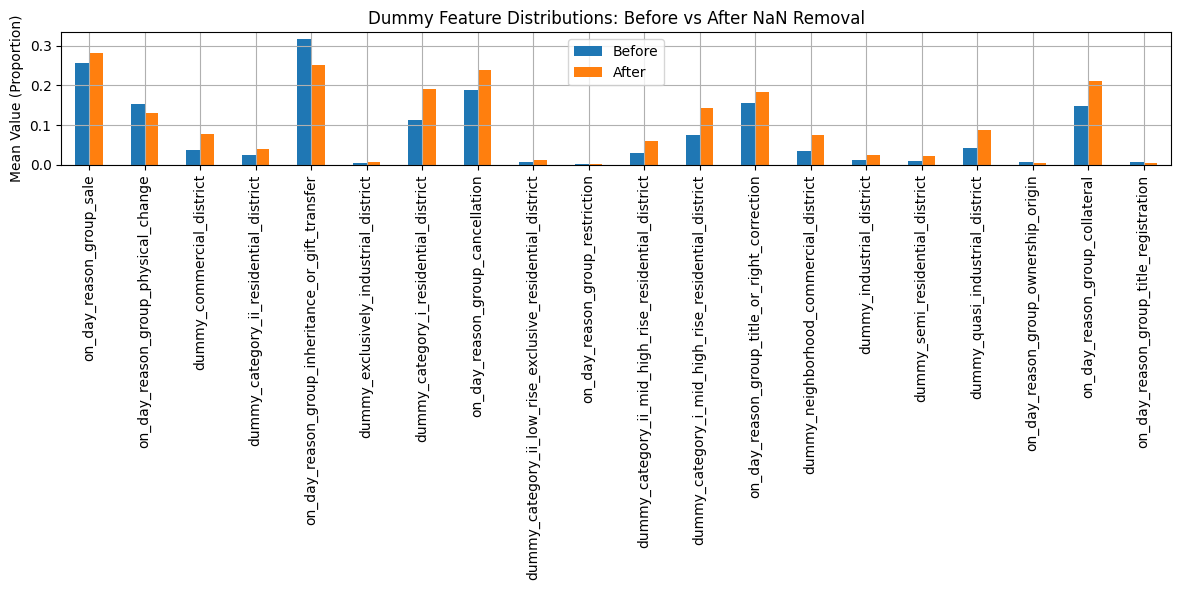

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 欠損除去前の特徴量データ
features_before = land_data_daily[feature_cols].copy()

# 欠損除去後の特徴量データ
# filtered_data = land_data_daily.dropna(subset=feature_cols)
features_after = filtered_data[feature_cols]

# 連続変数とダミー変数に分ける（0-1のものはダミーと判定）
continuous_cols = [col for col in feature_cols if not set(features_before[col].dropna().unique()).issubset({0.0, 1.0})]
dummy_cols = list(set(feature_cols) - set(continuous_cols))

# --- ① 連続変数の分布比較（ヒストグラム） ---
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(features_before[col].dropna(), bins=50, alpha=0.5, label='Before', density=True)
    plt.hist(features_after[col].dropna(), bins=50, alpha=0.5, label='After', density=True)
    plt.title(f'Distribution of {col} (Before vs After NaN Removal)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- ② ダミー変数の平均（出現比率）比較 ---
dummy_comparison = pd.DataFrame({
    'Before': features_before[dummy_cols].mean(),
    'After': features_after[dummy_cols].mean()
})
dummy_comparison['Difference'] = dummy_comparison['After'] - dummy_comparison['Before']

# 棒グラフで表示
dummy_comparison[['Before', 'After']].plot.bar(figsize=(12, 6))
plt.title('Dummy Feature Distributions: Before vs After NaN Removal')
plt.ylabel('Mean Value (Proportion)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
filtered_data["same_day_count"].value_counts()

same_day_count
2      1512236
4       433600
6       147977
8        40953
1        13952
        ...   
114          1
156          1
100          1
7            1
23           1
Name: count, Length: 93, dtype: int64

# 量的変数の標準化

In [12]:
# feature_cols = (
#     ['month_sin', 'same_day_count', 'size', 'official_price', 'population_density',
#      'building_coverage_ratio', 'floor_area_ratio', 'on_foot']
#     + [col for col in land_data_daily.columns
#        if col.startswith('on_day_reason_group_') and not col.endswith('_next')]
#     + [col for col in land_data_daily.columns if col.startswith('dummy_')]
# )

# target_cols = [col for col in land_data_daily.columns
#                if col.startswith('on_day_reason_group_') and col.endswith('_next')] + ['days_until_next']
from sklearn.preprocessing import StandardScaler
quantitative_cols =  (
    ['month_sin', 'same_day_count', 'size', 'official_price', 'population_density',
     'building_coverage_ratio', 'floor_area_ratio', 'on_foot']
)
scaler = StandardScaler()
filtered_data[quantitative_cols] = scaler.fit_transform(filtered_data[quantitative_cols])

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_25384\3051950900.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[quantitative_cols] = scaler.fit_transform(filtered_data[quantitative_cols])


# カテゴリ作成

In [13]:
len(filtered_data[filtered_data['days_until_next'] == 0])

0

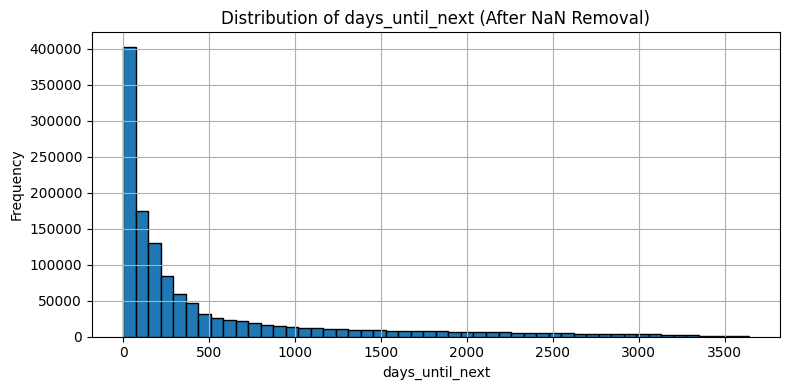

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(filtered_data["days_until_next"].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of days_until_next (After NaN Removal)')
plt.xlabel('days_until_next')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# 目的変数の作成
# sales1_periodを1カ月ごとのカテゴリに変換，1カ月以内を1，1カ月以上2カ月以内を2，2カ月以上3カ月以内を3，3カ月以上4カ月以内を4，4カ月以上5カ月以内を5，5カ月以上6カ月以内を6,6カ月以上1年以内を7,1年以上を0とする
def categorize_period(days):
    # 再登記されないデータはそれだけでカテゴリmaxにする
    if pd.isnull(days):
        return 5
    elif days <= 31:
        return 0
    elif days <= 31 * 4:
        return 1
    elif days <= 31 * 9:
        return 2
    elif days <= 31 * 24:
        return 3
    else:
        return 4

In [15]:
# ====== 1. filtered_dataにsales1_categoryを追加 ======
filtered_data['days_until_next_category'] = filtered_data['days_until_next'].apply(categorize_period)

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_25384\2487827993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['days_until_next_category'] = filtered_data['days_until_next'].apply(categorize_period)


In [16]:
# 1カ月以内は228966件なので，1165613 / 228966 = 5.09カテゴリがいい　月単位で割れたらいい
filtered_data['days_until_next_category'].value_counts()

days_until_next_category
5    898499
1    281129
4    264966
2    249010
0    248691
3    224595
Name: count, dtype: int64

In [ ]:
min(filtered_data['days_until_next_category'].value_counts())

224595

# カテゴリ0-4のデータ数をそろえる（均衡にする）ために224595件にアンダーサンプリング　→ここでやったらテストデータの分布が変わってしまうのでダメ！！！！学習時にアンダーサンプリングするようにやり直し！！！

In [ ]:
# sampled_dfs = []

# # アンダーサンプリング対象のカテゴリ
# target_counts = min(filtered_data['days_until_next_category'].value_counts())
# target_categories = [0, 1, 2, 4]

# for cat in target_categories:
#     cat_df = filtered_data[filtered_data['days_until_next_category'] == cat]
#     # n_sample = min(len(cat_df), target_counts)
#     sampled_df = cat_df.sample(n=target_counts, random_state=42)
#     sampled_dfs.append(sampled_df)

# # その他（カテゴリ5など）はそのまま
# other_df = filtered_data[~filtered_data['days_until_next_category'].isin(target_categories)]

# # 結合
# filtered_data = pd.concat(sampled_dfs + [other_df], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

# # カテゴリごとの件数確認（任意）
# print(filtered_data['days_until_next_category'].value_counts())


days_until_next_category
5    898499
4    224595
2    224595
0    224595
1    224595
3    224595
Name: count, dtype: int64


# 再登記されなかったデータの日数を31*120で埋める

In [17]:
filtered_data['days_until_next'] = filtered_data['days_until_next'].fillna(31 * 120)

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_25384\2768512382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['days_until_next'] = filtered_data['days_until_next'].fillna(31 * 120)


## 再登記されなかったデータの登記原因_nextを0で埋める

In [18]:
# 対象の列名リストを取得
reason_next_cols = [
    col for col in filtered_data.columns
    if col.startswith('on_day_reason_group_') and col.endswith('_next')
]

# 条件に合う行に対して 0.0 を代入
filtered_data.loc[filtered_data['will_not_be_re_registered'] == 1, reason_next_cols] = 0.0


# 列を特徴量と目的変数だけにする

In [19]:
feature_cols = (
    ['month_sin', 'same_day_count', 'size', 'official_price', 'population_density',
     'building_coverage_ratio', 'floor_area_ratio', 'on_foot']
    + [col for col in land_data_daily.columns
       if col.startswith('on_day_reason_group_') and not col.endswith('_next')]
    + [col for col in land_data_daily.columns if col.startswith('dummy_')]
)

target_cols = ['will_not_be_re_registered'] + [col for col in land_data_daily.columns
               if col.startswith('on_day_reason_group_') and col.endswith('_next')] + ['days_until_next_category'] + ['days_until_next']

land_data_for_prediction = filtered_data[feature_cols + target_cols]

In [20]:
land_data_for_prediction.head()

,month_sin,same_day_count,size,official_price,population_density,building_coverage_ratio,floor_area_ratio,on_foot,on_day_reason_group_cancellation,on_day_reason_group_collateral,...,on_day_reason_group_inheritance_or_gift_transfer_next,on_day_reason_group_other_causes_transfer_next,on_day_reason_group_ownership_origin_next,on_day_reason_group_physical_change_next,on_day_reason_group_restriction_next,on_day_reason_group_sale_next,on_day_reason_group_title_or_right_correction_next,on_day_reason_group_title_registration_next,days_until_next_category,days_until_next
174581,-0.015985,-0.330584,-0.001409,-0.248866,-0.973352,-0.022588,-0.042197,0.131683,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,49.0
174635,-0.015985,-0.330584,-0.051904,-0.248866,-0.973352,-0.022588,-0.042197,0.142690,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3720.0
174678,-0.015985,-0.330584,-0.021141,-0.248866,-0.973352,-0.022588,-0.042197,0.164705,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3720.0
174682,-0.015985,0.426838,-0.047517,-0.248866,-0.973352,-0.022588,-0.042197,0.164705,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3720.0
174685,-0.015985,1.184261,-0.072573,-0.248866,-0.973352,-0.022588,-0.042197,0.164705,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,61.0


In [21]:
land_data_for_prediction.isnull().sum()

month_sin                                                    0
same_day_count                                               0
size                                                         0
official_price                                               0
population_density                                           0
building_coverage_ratio                                      0
floor_area_ratio                                             0
on_foot                                                      0
on_day_reason_group_cancellation                             0
on_day_reason_group_collateral                               0
on_day_reason_group_inheritance_or_gift_transfer             0
on_day_reason_group_other_causes_transfer                    0
on_day_reason_group_ownership_origin                         0
on_day_reason_group_physical_change                          0
on_day_reason_group_restriction                              0
on_day_reason_group_sale                               

# 保存

In [22]:
land_data_for_prediction.to_csv(r"D:\fujiwara\M\data\after_preprocess\land_data_for_prediction.csv", index=False)

# 建物

In [ ]:
build_data_daily = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\build_data_daily.csv")

# 年だけ置換処理（"3013" → "2013" のように）
build_data_daily['build_date'] = build_data_daily['build_date'].str.replace(r'^3(\d{3})', r'2\1', regex=True)

build_data_daily['register_date'] = pd.to_datetime(build_data_daily['register_date'])
build_data_daily['build_date'] = pd.to_datetime(build_data_daily['build_date'])

# 築年数を計算する
build_data_daily['building_age'] = ((build_data_daily['register_date'] - build_data_daily['build_date']).dt.days // 31)  # 小数点以下切り捨て

# monthを抽出する
build_data_daily['month'] = build_data_daily['register_date'].dt.month
build_data_daily['month_sin'] = np.sin(2 * np.pi * build_data_daily['month'] / 12)

# 各都道府県の人口密度データを辞書形式で用意(令和2年度，最新版)　1km2あたりの人口
prefecture_density = {
    '北海道': 66.6, '青森県': 128.3, '岩手県': 79.2, '宮城県': 316.1, '秋田県': 82.4,
    '山形県': 114.6, '福島県': 133.0, '茨城県': 470.2, '栃木県': 301.7, '群馬県': 304.8,
    '埼玉県': 1934.0, '千葉県': 1218.5, '東京都': 6402.6, '神奈川県': 3823.2, '新潟県': 174.9,
    '富山県': 243.6, '石川県': 270.5, '福井県': 183.0, '山梨県': 181.4, '長野県': 151.0,
    '岐阜県': 186.3, '静岡県': 467.2, '愛知県': 1458.0, '三重県': 306.6, '滋賀県': 351.9,
    '京都府': 559.0, '大阪府': 4638.4, '兵庫県': 650.5, '奈良県': 358.8, '和歌山県': 195.3,
    '鳥取県': 157.8, '島根県': 100.1, '岡山県': 265.4, '広島県': 330.2, '山口県': 219.6,
    '徳島県': 173.5, '香川県': 506.3, '愛媛県': 235.2, '高知県': 97.3, '福岡県': 1029.8,
    '佐賀県': 332.5, '長崎県': 317.7, '熊本県': 234.6, '大分県': 177.2, '宮崎県': 138.3,
    '鹿児島県': 172.9, '沖縄県': 642.9
}

# DataFrameに人口密度カラムを追加
build_data_daily['population_density'] = build_data_daily['pref'].map(prefecture_density)
build_data_daily = pd.get_dummies(build_data_daily, columns=['use_district'], prefix='dummy', drop_first=True, dtype=float)

# 各 group_key ごとの登記日数をカウント → 登記日数フラグ列を作成（再登記される場合は1）
date_counts = build_data_daily.groupby('group_key')['register_date'].transform('nunique')
build_data_daily['will_not_be_re_registered'] = (date_counts <= 1).astype(int)

# 最終登記日を取得（すべての group_key 対象でOK）
last_date = build_data_daily.groupby('group_key')['register_date'].transform('max')

# フィルタ適用：再登記がある場合は最終日を除く、再登記がないものはそのまま残す
build_data_daily = build_data_daily[
    (build_data_daily['will_not_be_re_registered'] == 1) |
    (build_data_daily['register_date'] < last_date)
]


C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_23904\841051501.py:1: DtypeWarning: Columns (7,20,21,24,33,34,35,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  build_data_daily = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\build_data_daily.csv")


count    41892.000000
mean       295.218013
std        225.050326
min       -106.000000
25%          2.000000
50%        331.000000
75%        490.000000
max       1424.000000
Name: building_age, dtype: float64


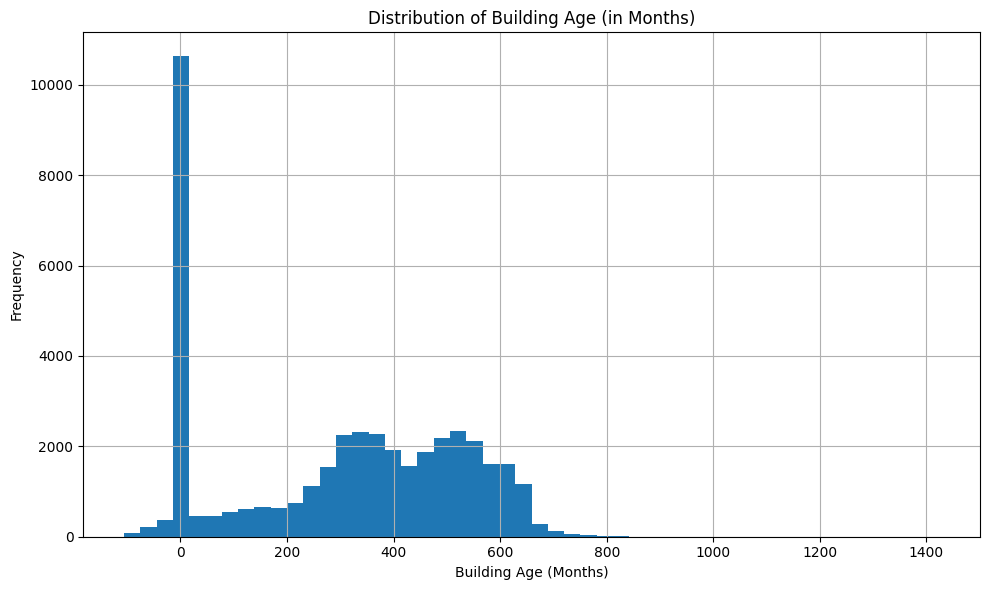

In [ ]:
print(build_data_daily['building_age'].describe())
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
build_data_daily['building_age'].dropna().hist(bins=50)
plt.xlabel("Building Age (Months)")
plt.ylabel("Frequency")
plt.title("Distribution of Building Age (in Months)")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
build_data_daily['building_age'] = build_data_daily['building_age'].clip(lower=0)

In [ ]:
print(build_data_daily['size'].unique())
print(build_data_daily['official_price'].unique())
print(build_data_daily['land_price'].unique())
print(build_data_daily['building_coverage_ratio'].unique())
print(build_data_daily['floor_area_ratio'].unique())
print(build_data_daily['main_direction'].unique())

print(build_data_daily['on_foot'].unique())
print(build_data_daily['new_or_existing'].unique())
print(build_data_daily['building_age'].unique())
print(build_data_daily['total_units'].unique())
print(build_data_daily['ground_floors'].unique())
print(build_data_daily['underground_floors'].unique())
print(build_data_daily['building_area'].unique())
print(build_data_daily['min_exclusive_area'].unique())
print(build_data_daily['max_exclusive_area'].unique())
print(build_data_daily['parking_spaces'].unique())
print(build_data_daily['min_layout'].unique())
print(build_data_daily['max_layout'].unique())
print(build_data_daily['total_floor_area'].unique())
print(build_data_daily['land_area'].unique())
print(build_data_daily['property_type'].unique())
print(build_data_daily['structure'].unique())

[nan 'マンション' 'アパート' 'その他' 'ビル' '店舗' '倉庫' 'タウンハウス' '寮' '工場']
[nan 'RC' '木造' 'ALC' '鉄骨造' 'SRC' 'その他' 'PC' 'CB' 'HPC' '鉄筋ブロック造' 'CFT']


In [ ]:
build_data_daily.columns

Index(['register_date', 'pref', 'city', 'new_or_existing', 'type', 'location',
       'chiban', 'kaoku_number', 'land_num', 'other', 'lat', 'lon', 'size',
       'building_coverage_ratio', 'floor_area_ratio', 'official_price',
       'land_price', 'lat2', 'lon2', 'property_name', 'address',
       'min_exclusive_area', 'max_exclusive_area', 'build_date', 'total_units',
       'ground_floors', 'underground_floors', 'parking_spaces',
       'main_direction', 'land_area', 'building_area', 'total_floor_area',
       'max_layout', 'min_layout', 'property_type', 'structure', 'id',
       'line_name', 'station_name', 'on_foot', 'parcel_num', 'address_group',
       'group_key', 'same_day_count', 'on_day_reason_group_cancellation',
       'on_day_reason_group_collateral',
       'on_day_reason_group_inheritance_or_gift_transfer',
       'on_day_reason_group_ownership_origin',
       'on_day_reason_group_physical_change',
       'on_day_reason_group_restriction', 'on_day_reason_group_sale',
   

In [ ]:
# 特徴量と目的変数のカラム名を定義（_nextを除外）
feature_cols = (
    ['month_sin', 'same_day_count', 'population_density', 'on_foot', 'new_or_existing', 'building_age',
     'total_units', 'ground_floors', 'underground_floors', 'building_area', 'min_exclusive_area', 'max_exclusive_area',
     'parking_spaces', 'min_layout', 'max_layout', 'total_floor_area', 'land_area', 'property_type', 'structure']
    + [col for col in build_data_daily.columns
       if col.startswith('on_day_reason_group_') and not col.endswith('_next')]
    + [col for col in build_data_daily.columns if col.startswith('dummy_')]
)

target_cols = [col for col in build_data_daily.columns
               if col.startswith('on_day_reason_group_') and col.endswith('_next')] + ['days_until_next']

# 欠損除去前のレコード数
original_len = len(build_data_daily)

# 特徴量の欠損を除去（目的変数には影響しない）
filtered_data = build_data_daily.dropna(subset=feature_cols)

# 欠損除去後のレコード数
filtered_len = len(filtered_data)

# 減少数と割合を出力
print(f"元のデータ数: {original_len}")
print(f"欠損除去後のデータ数: {filtered_len}")
print(f"減少数: {original_len - filtered_len}")
print(f"減少割合: {(original_len - filtered_len) / original_len:.2%}")


元のデータ数: 4099994
欠損除去後のデータ数: 107
減少数: 4099887
減少割合: 100.00%


In [ ]:
# 欠損数を列ごとに表示
missing_counts = build_data_daily[feature_cols].isna().sum()

# 表形式で見やすく出力
print(missing_counts.sort_values(ascending=False))


underground_floors                                  4099461
parking_spaces                                      4099082
max_layout                                          4098897
min_layout                                          4098895
land_area                                           4098859
building_area                                       4098777
total_floor_area                                    4098586
max_exclusive_area                                  4095016
min_exclusive_area                                  4094936
total_units                                         4076072
on_foot                                             4066093
building_age                                        4058102
structure                                           4057544
ground_floors                                       4052052
property_type                                       4050149
population_density                                        0
new_or_existing                         

In [ ]:
import matplotlib.pyplot as plt

# 欠損除去前の days_until_next をコピー
days_before = build_data_daily['days_until_next'].dropna()

# 欠損除去後の days_until_next
days_after = filtered_data['days_until_next']

# ヒストグラム比較
plt.figure(figsize=(10, 5))
plt.hist(days_before, bins=50, alpha=0.5, label='Before NaN drop', density=True)
plt.hist(days_after, bins=50, alpha=0.5, label='After NaN drop', density=True)
plt.xlabel('days_until_next')
plt.ylabel('Density')
plt.title('Distribution of days_until_next: Before vs After NaN Removal')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 目的変数の one-hot 登記原因カラム一覧
reason_next_cols = [col for col in build_data_daily.columns if col.startswith('on_day_reason_group_') and col.endswith('_next')]

# 欠損除去前：各カテゴリの平均（＝出現比率）
before_ratio = build_data_daily[reason_next_cols].dropna().mean()

# 欠損除去後：NaN除去後のサブセットでの平均（＝出現比率）
after_ratio = filtered_data[reason_next_cols].mean()

# 比率比較を1つのDataFrameにまとめて表示
comparison_df = pd.DataFrame({
    'Before_NaN_Drop': before_ratio,
    'After_NaN_Drop': after_ratio,
    'Difference': after_ratio - before_ratio
})

import seaborn as sns
import matplotlib.pyplot as plt

# 棒グラフで可視化
comparison_df[['Before_NaN_Drop', 'After_NaN_Drop']].plot.bar(figsize=(12, 6))
plt.title('Distribution of Registration Reasons (next): Comparison Before and After Missing Value Removal')
plt.ylabel('Occurrence Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(build_data_daily['days_until_next'].isnull().sum())
print(build_data_daily["will_not_be_re_registered"].value_counts())
print(filtered_data['days_until_next'].isnull().sum())
print(filtered_data['will_not_be_re_registered'].value_counts())

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 欠損除去前の特徴量データ
features_before = build_data_daily[feature_cols].copy()

# 欠損除去後の特徴量データ
# filtered_data = build_data_daily.dropna(subset=feature_cols)
features_after = filtered_data[feature_cols]

# 連続変数とダミー変数に分ける（0-1のものはダミーと判定）
continuous_cols = [col for col in feature_cols if not set(features_before[col].dropna().unique()).issubset({0.0, 1.0})]
dummy_cols = list(set(feature_cols) - set(continuous_cols))

# --- ① 連続変数の分布比較（ヒストグラム） ---
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(features_before[col].dropna(), bins=50, alpha=0.5, label='Before', density=True)
    plt.hist(features_after[col].dropna(), bins=50, alpha=0.5, label='After', density=True)
    plt.title(f'Distribution of {col} (Before vs After NaN Removal)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- ② ダミー変数の平均（出現比率）比較 ---
dummy_comparison = pd.DataFrame({
    'Before': features_before[dummy_cols].mean(),
    'After': features_after[dummy_cols].mean()
})
dummy_comparison['Difference'] = dummy_comparison['After'] - dummy_comparison['Before']

# 棒グラフで表示
dummy_comparison[['Before', 'After']].plot.bar(figsize=(12, 6))
plt.title('Dummy Feature Distributions: Before vs After NaN Removal')
plt.ylabel('Mean Value (Proportion)')
plt.grid(True)
plt.tight_layout()
plt.show()


# 区分建物

In [ ]:
unit_build_data_daily = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\unit_build_data_daily.csv")

# 年だけ置換処理（"3013" → "2013" のように）
unit_build_data_daily['build_date'] = unit_build_data_daily['build_date'].str.replace(r'^3(\d{3})', r'2\1', regex=True)

unit_build_data_daily['register_date'] = pd.to_datetime(unit_build_data_daily['register_date'])
unit_build_data_daily['build_date'] = pd.to_datetime(unit_build_data_daily['build_date'])

# 築年数を計算する
unit_build_data_daily['building_age'] = ((unit_build_data_daily['register_date'] - unit_build_data_daily['build_date']).dt.days // 31)  # 小数点以下切り捨て

# monthを抽出する
unit_build_data_daily['month'] = unit_build_data_daily['register_date'].dt.month
unit_build_data_daily['month_sin'] = np.sin(2 * np.pi * unit_build_data_daily['month'] / 12)

# 各都道府県の人口密度データを辞書形式で用意(令和2年度，最新版)　1km2あたりの人口
prefecture_density = {
    '北海道': 66.6, '青森県': 128.3, '岩手県': 79.2, '宮城県': 316.1, '秋田県': 82.4,
    '山形県': 114.6, '福島県': 133.0, '茨城県': 470.2, '栃木県': 301.7, '群馬県': 304.8,
    '埼玉県': 1934.0, '千葉県': 1218.5, '東京都': 6402.6, '神奈川県': 3823.2, '新潟県': 174.9,
    '富山県': 243.6, '石川県': 270.5, '福井県': 183.0, '山梨県': 181.4, '長野県': 151.0,
    '岐阜県': 186.3, '静岡県': 467.2, '愛知県': 1458.0, '三重県': 306.6, '滋賀県': 351.9,
    '京都府': 559.0, '大阪府': 4638.4, '兵庫県': 650.5, '奈良県': 358.8, '和歌山県': 195.3,
    '鳥取県': 157.8, '島根県': 100.1, '岡山県': 265.4, '広島県': 330.2, '山口県': 219.6,
    '徳島県': 173.5, '香川県': 506.3, '愛媛県': 235.2, '高知県': 97.3, '福岡県': 1029.8,
    '佐賀県': 332.5, '長崎県': 317.7, '熊本県': 234.6, '大分県': 177.2, '宮崎県': 138.3,
    '鹿児島県': 172.9, '沖縄県': 642.9
}

# DataFrameに人口密度カラムを追加
unit_build_data_daily['population_density'] = unit_build_data_daily['pref'].map(prefecture_density)
unit_build_data_daily = pd.get_dummies(unit_build_data_daily, columns=['use_district'], prefix='dummy', drop_first=True, dtype=float)

# 各 group_key ごとの登記日数をカウント → 登記日数フラグ列を作成（再登記される場合は1）
date_counts = unit_build_data_daily.groupby('group_key')['register_date'].transform('nunique')
unit_build_data_daily['will_not_be_re_registered'] = (date_counts <= 1).astype(int)

# 最終登記日を取得（すべての group_key 対象でOK）
last_date = unit_build_data_daily.groupby('group_key')['register_date'].transform('max')

# フィルタ適用：再登記がある場合は最終日を除く、再登記がないものはそのまま残す
unit_build_data_daily = unit_build_data_daily[
    (unit_build_data_daily['will_not_be_re_registered'] == 1) |
    (unit_build_data_daily['register_date'] < last_date)
]


C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_23904\3484385301.py:1: DtypeWarning: Columns (7,33,34,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  unit_build_data_daily = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\unit_build_data_daily.csv")


count    1.385142e+06
mean     2.213652e+02
std      1.800172e+02
min     -1.250000e+02
25%      6.100000e+01
50%      1.930000e+02
75%      3.640000e+02
max      1.160000e+03
Name: building_age, dtype: float64


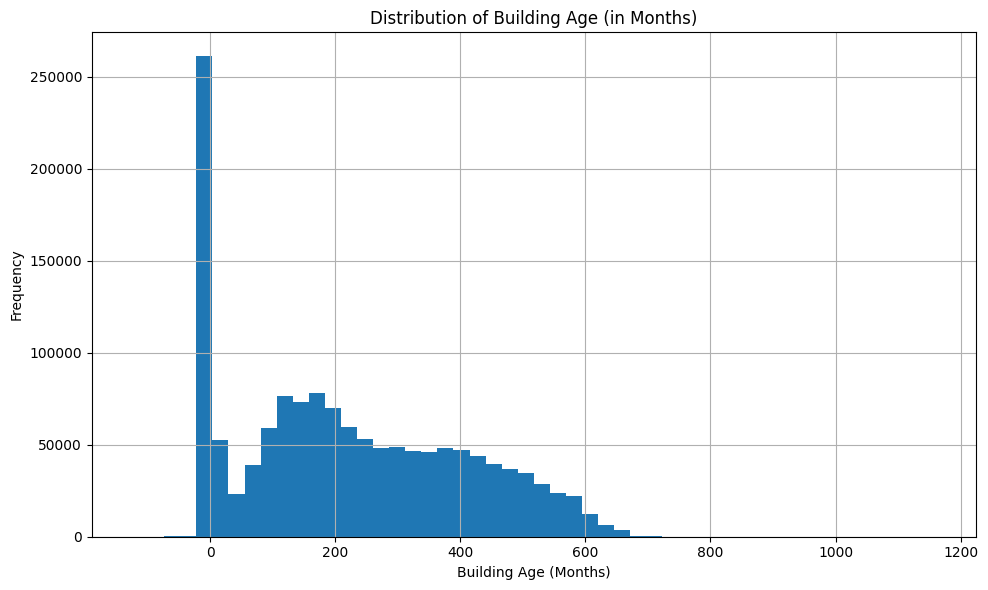

In [ ]:
print(unit_build_data_daily['building_age'].describe())
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
unit_build_data_daily['building_age'].dropna().hist(bins=50)
plt.xlabel("Building Age (Months)")
plt.ylabel("Frequency")
plt.title("Distribution of Building Age (in Months)")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
unit_build_data_daily['building_age'] = unit_build_data_daily['building_age'].clip(lower=0)

In [ ]:
# print(unit_build_data_daily['size'].unique())
# print(unit_build_data_daily['official_price'].unique())
# print(unit_build_data_daily['land_price'].unique())
# print(unit_build_data_daily['building_coverage_ratio'].unique())
# print(unit_build_data_daily['floor_area_ratio'].unique())
# print(unit_build_data_daily['main_direction'].unique())

# print(unit_build_data_daily['on_foot'].unique())
# print(unit_build_data_daily['new_or_existing'].unique())
# print(unit_build_data_daily['building_age'].unique())
# print(unit_build_data_daily['total_units'].unique())
# print(unit_build_data_daily['ground_floors'].unique())
# print(unit_build_data_daily['underground_floors'].unique())
# print(unit_build_data_daily['building_area'].unique())
# print(unit_build_data_daily['min_exclusive_area'].unique())
# print(unit_build_data_daily['max_exclusive_area'].unique())
# print(unit_build_data_daily['parking_spaces'].unique())
print(unit_build_data_daily['min_layout'].unique())
print(unit_build_data_daily['max_layout'].unique())
print(unit_build_data_daily['total_floor_area'].unique())
print(unit_build_data_daily['land_area'].unique())
print(unit_build_data_daily['property_type'].unique())
print(unit_build_data_daily['structure'].unique())

[nan '3LDK' '2SLDK' '2LDK' '1SLDK' '3SLDK' '4LDK' '1LDK' '1K' '1DK'
 '1SSLDK' '1R' '2DK' '4K' '4DK' 'その他' '3DK' '2SSLDK' '2K' '4SLDK' '1SK'
 '3K' 'studio' '1studio']
[nan '4LDK' '3LDK' '5LDK' '5DK' '1R' '1K' '2LDK' '4SLDK' '1LDK' '3DK'
 '1DK' '2SLDK' '2DK' '3SLDK' '2K' 'その他' '4DK' '4K' '5SLDK' '6SSLDK' '6LDK'
 '4SSLDK' '2SSLDK' '3SSLDK' '1SLDK' '3K' '1SK' '7LDK' '8LDK' '1studio'
 '1SSLDK' '6SLDK']
[    nan 6144.53 3192.62 ... 2913.1  4366.38 3634.61]
[    nan 3014.87 1370.34 ... 1195.36 1857.11 1434.36]
[nan 'マンション' 'その他' 'アパート' '店舗' 'ビル' 'タウンハウス' '倉庫' '工場']
[nan 'RC' 'SRC' '鉄骨造' 'ALC' 'その他' '木造' 'PC' 'CB' 'HPC']


In [ ]:
# 特徴量と目的変数のカラム名を定義（_nextを除外）
feature_cols = (
    ['month_sin', 'same_day_count', 'population_density', 'on_foot', 'new_or_existing', 'building_age',
     'total_units', 'ground_floors', 'underground_floors', 'building_area', 'min_exclusive_area', 'max_exclusive_area',
     'parking_spaces', 'min_layout', 'max_layout', 'total_floor_area', 'land_area', 'property_type', 'structure']
    + [col for col in unit_build_data_daily.columns
       if col.startswith('on_day_reason_group_') and not col.endswith('_next')]
    + [col for col in unit_build_data_daily.columns if col.startswith('dummy_')]
)

target_cols = [col for col in unit_build_data_daily.columns
               if col.startswith('on_day_reason_group_') and col.endswith('_next')] + ['days_until_next']

# 欠損除去前のレコード数
original_len = len(unit_build_data_daily)

# 特徴量の欠損を除去（目的変数には影響しない）
filtered_data = unit_build_data_daily.dropna(subset=feature_cols)

# 欠損除去後のレコード数
filtered_len = len(filtered_data)

# 減少数と割合を出力
print(f"元のデータ数: {original_len}")
print(f"欠損除去後のデータ数: {filtered_len}")
print(f"減少数: {original_len - filtered_len}")
print(f"減少割合: {(original_len - filtered_len) / original_len:.2%}")


元のデータ数: 2717098
欠損除去後のデータ数: 156563
減少数: 2560535
減少割合: 94.24%


# 全体